In [13]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (adjust path if needed)
df = pd.read_csv("../data/insurance_data.txt", sep = "|")

# Show first few rows
df.head()

C:\Users\ltlid\AppData\Local\Temp\ipykernel_7516\164089897.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/insurance_data.txt", sep = "|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
# Check structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [4]:

# Summary stats for numerical columns
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [5]:

# Check for missing values
df.isnull().sum().sort_values(ascending=False)

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
VehicleType                     552
make                            552
mmcode                          552
Model                           552
Cylinders                       552
bodytype                        552
kilowatts                       552
NumberOfDoors                   552
VehicleIntroDate                552
cubiccapacity                   552
CapitalOutstanding                2
SubCrestaZone                     0
ItemType                          0
Province                          0
Country                           0
PostalCode                        0
MainCrestaZone              

In [6]:
# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [7]:

# Convert categorical fields to category dtype
categorical_cols = [
    'Gender', 'Province', 'VehicleType', 'make', 'Model', 
    'CoverType', 'CoverCategory', 'Product', 'StatutoryClass'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [10]:
# Summary stats for financial columns
financial_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured']

df[financial_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalPremium,1000098.0,61.905496,2.302845e+02,-782.576754,0.0,2.178333,21.929825,6.528260e+04
TotalClaims,1000098.0,64.861190,2.384075e+03,-12002.412281,0.0,0.000000,0.000000,3.930921e+05
CustomValueEstimate,220456.0,225531.129942,5.645157e+05,20000.000000,135000.0,220000.000000,280000.000000,2.655000e+07
SumInsured,1000098.0,604172.732589,1.508332e+06,0.010000,5000.0,7500.000000,250000.000000,1.263620e+07


In [11]:
# Total and percentage of missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_percent})
missing_df[missing_df['Missing'] > 0].sort_values(by='Missing', ascending=False)


,Missing,Percent
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


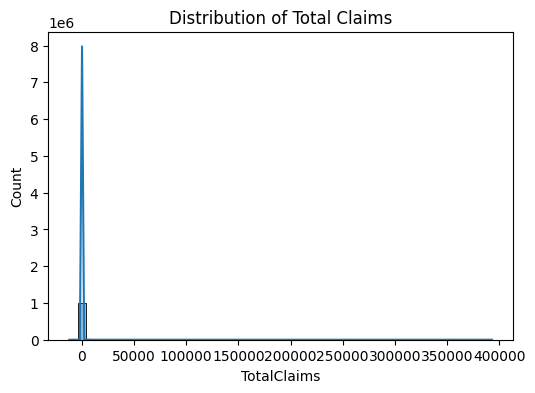

In [14]:
#Univariate Analysis (Distributions)
# Histogram: TotalClaims
plt.figure(figsize=(6,4))
sns.histplot(df['TotalClaims'], kde=True, bins=50)
plt.title("Distribution of Total Claims")
plt.show()


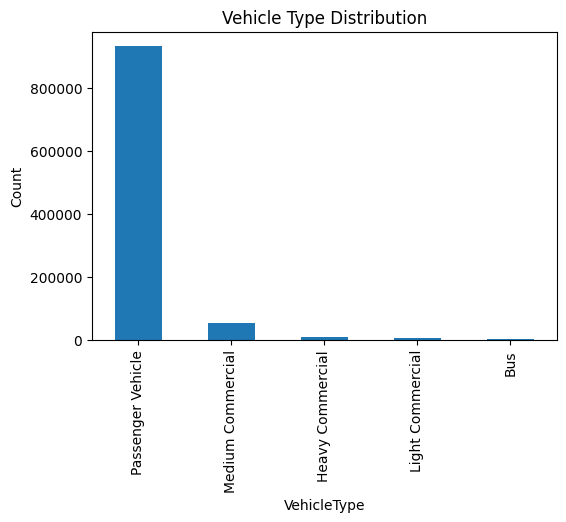

In [ ]:
#Categorical Bar Chart
# Bar chart based on VehicleType
plt.figure(figsize=(6,4))
df['VehicleType'].value_counts().plot(kind='bar')
plt.title("Vehicle Type Distribution")
plt.ylabel("Count")
plt.show()

C:\Users\ltlid\AppData\Local\Temp\ipykernel_7516\3190476067.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_province = df.groupby('Province')['LossRatio'].mean().sort_values()
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\week 3\insurance-risk-insights\.venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\week 3\insurance-risk-insights\.venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


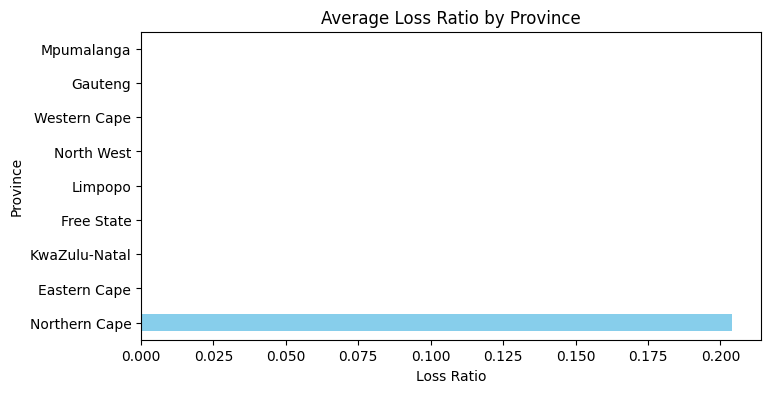

In [17]:
#Step 6: Bivariate / Multivariate Analysis
#Loss Ratio by Province, Gender, VehicleType

df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Loss Ratio by Province
loss_by_province = df.groupby('Province')['LossRatio'].mean().sort_values()

plt.figure(figsize=(8,4))
loss_by_province.plot(kind='barh', color='skyblue')
plt.title("Average Loss Ratio by Province")
plt.xlabel("Loss Ratio")
plt.show()

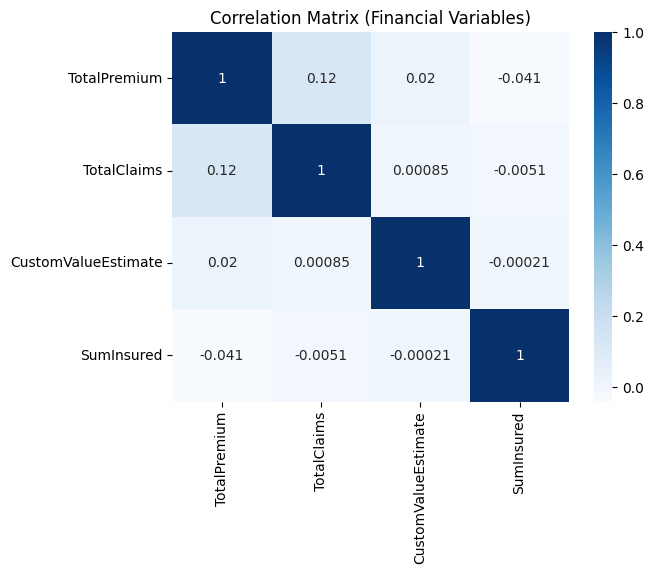

In [18]:
# Correlation heatmap (financial features only)
corr_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured']
corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix (Financial Variables)")
plt.show()


C:\Users\ltlid\AppData\Local\Temp\ipykernel_7516\3675552903.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Province')['TotalPremium'].mean().sort_values().plot(kind='barh')


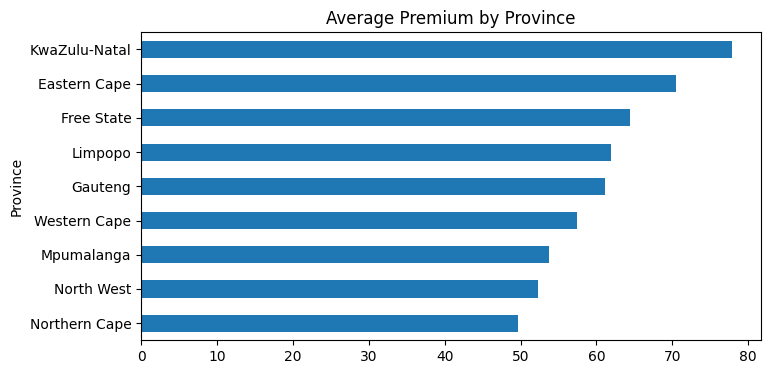

In [19]:
#Geographic and Temporal Trends
#Premiums by Province
plt.figure(figsize=(8,4))
df.groupby('Province')['TotalPremium'].mean().sort_values().plot(kind='barh')
plt.title("Average Premium by Province")
plt.show()


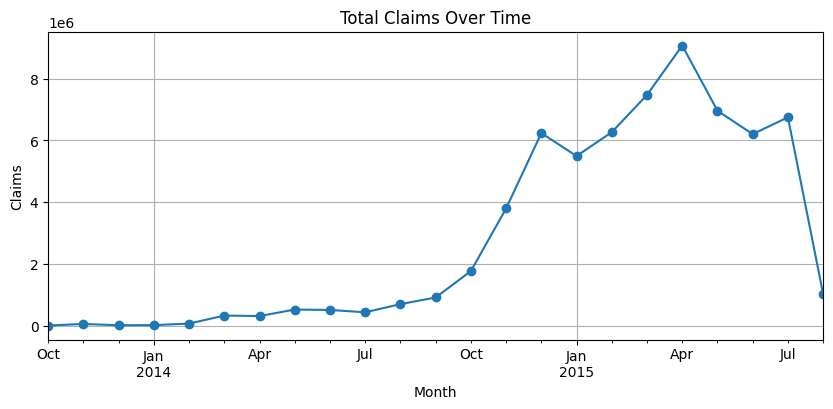

In [20]:
#Monthly Claims Trend
monthly_trend = df.groupby('TransactionMonth')['TotalClaims'].sum()

plt.figure(figsize=(10,4))
monthly_trend.plot(marker='o')
plt.title("Total Claims Over Time")
plt.xlabel("Month")
plt.ylabel("Claims")
plt.grid(True)
plt.show()

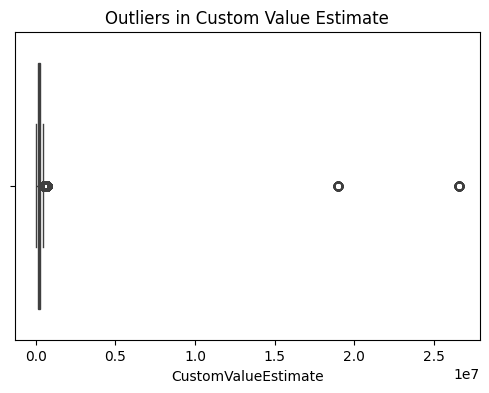

In [21]:
#Outlier Detection with Box Plots
# Boxplot for CustomValueEstimate
plt.figure(figsize=(6,4))
sns.boxplot(x=df['CustomValueEstimate'])
plt.title("Outliers in Custom Value Estimate")
plt.show()

C:\Users\ltlid\AppData\Local\Temp\ipykernel_7516\1445693668.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('VehicleType')['LossRatio'].mean().sort_values().plot(kind='barh', color='orange')
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\week 3\insurance-risk-insights\.venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\ltlid\OneDrive\Desktop\Educational\10 Academy\week 3\insurance-risk-insights\.venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


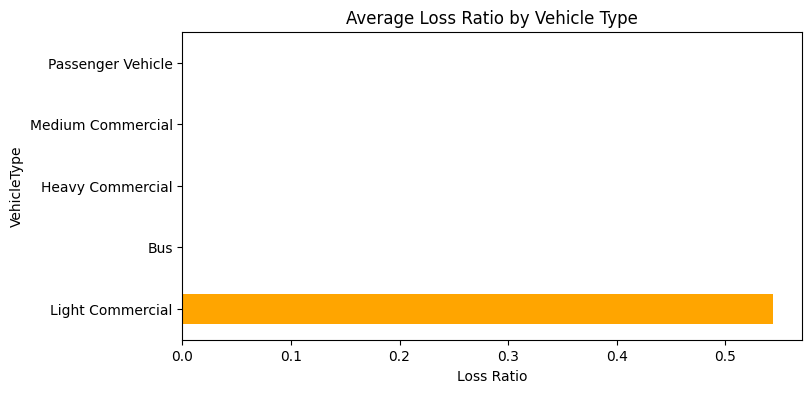

In [22]:
#Summary Plots (3 Key Visuals)
    #Loss Ratio by VehicleType
    #Total Premium by Gender
    #Monthly Claims Trend

# Loss Ratio by Vehicle Type
plt.figure(figsize=(8,4))
df.groupby('VehicleType')['LossRatio'].mean().sort_values().plot(kind='barh', color='orange')
plt.title("Average Loss Ratio by Vehicle Type")
plt.xlabel("Loss Ratio")
plt.show()

C:\Users\ltlid\AppData\Local\Temp\ipykernel_7516\3166223679.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['TotalPremium'].sum().sort_values().plot(


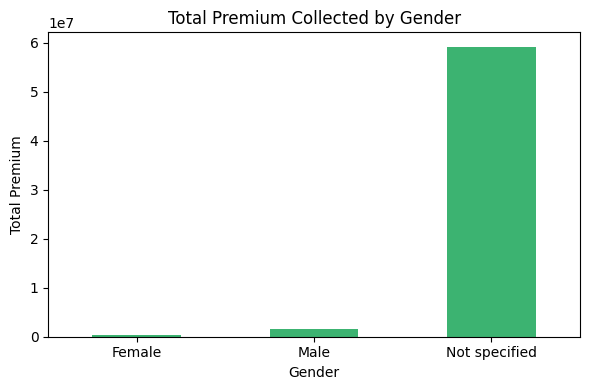

In [23]:
# Total Premium by Gender
plt.figure(figsize=(6,4))
df.groupby('Gender')['TotalPremium'].sum().sort_values().plot(
    kind='bar', color='mediumseagreen'
)
plt.title("Total Premium Collected by Gender")
plt.ylabel("Total Premium")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

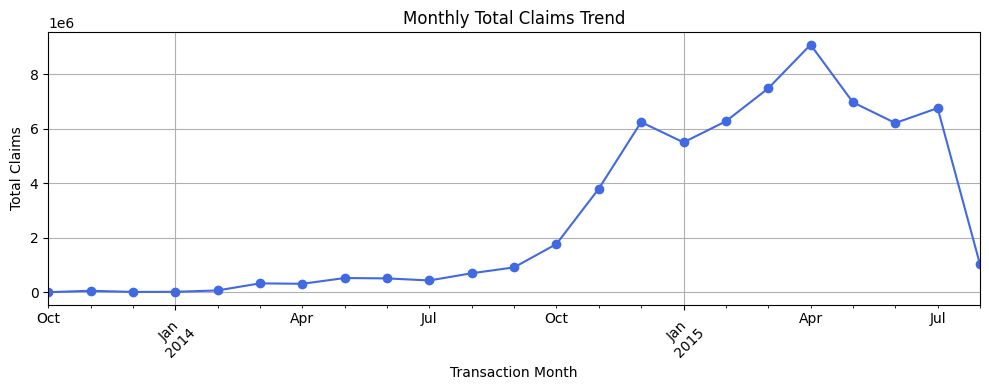

In [25]:
# Monthly trend of claims
monthly_claims = df.groupby('TransactionMonth')['TotalClaims'].sum()

plt.figure(figsize=(10,4))
monthly_claims.plot(marker='o', linestyle='-', color='royalblue')
plt.title("Monthly Total Claims Trend")
plt.xlabel("Transaction Month")
plt.ylabel("Total Claims")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()